In [499]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sn
import json

from scipy import stats
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [532]:
temp = pd.read_csv("data/commodity-prices.csv")
temp

,Date,All Commodity Price Index,Non-Fuel Price Index,Food and Beverage Price Index,Food Price Index,Beverage Price Index,Industrial Inputs Price Index,Agricultural Raw Materials Index,Metals Price Index,Fuel Energy Index,...,Sugar Free Market,Sugar U.S. import price,Sunflower oil,Tea,Tin,Uranium,Wheat,Wool coarse,Wool fine,Zinc
0,1980-01-01,NaN,NaN,NaN,NaN,189.310021,81.889650,78.900146,84.049004,NaN,...,17.299999,19.660000,566.926957,225.179901,16973.587904,40.000000,175.634750,553.120940,684.277366,773.821533
1,1980-02-01,NaN,NaN,NaN,NaN,190.387928,83.048367,75.715154,88.345232,NaN,...,22.750000,24.689999,573.958609,233.094498,17090.213164,38.000000,172.695236,568.154805,722.567093,868.620361
2,1980-03-01,NaN,NaN,NaN,NaN,194.060355,75.228895,69.002475,79.726312,NaN,...,19.630001,21.180000,535.284522,226.833298,17460.590400,35.000000,163.509323,552.745109,695.956860,740.752441
3,1980-04-01,NaN,NaN,NaN,NaN,186.137888,72.471253,67.877108,75.789658,NaN,...,21.250000,22.669998,486.062957,221.806793,17041.712600,32.000000,156.528030,510.650280,688.130355,707.683105
4,1980-05-01,NaN,NaN,NaN,NaN,185.070241,69.588103,65.879671,72.266748,NaN,...,30.939999,31.889999,502.763130,229.611206,17180.604736,32.000000,161.304703,524.932443,720.760976,701.069092
5,1980-06-01,NaN,NaN,NaN,NaN,179.375309,68.855698,67.814547,69.607734,NaN,...,30.799999,32.099998,493.973565,235.409302,17211.467264,31.500000,157.630341,532.950497,737.256781,676.818359
6,1980-07-01,NaN,NaN,NaN,NaN,164.080365,72.417971,71.535431,73.055440,NaN,...,27.700001,28.750000,555.500522,222.291794,17090.213164,31.500000,168.653442,540.843299,736.895499,712.092285
7,1980-08-01,NaN,NaN,NaN,NaN,150.411836,74.204209,76.029528,72.885759,NaN,...,31.770000,33.139999,577.474435,226.039703,17008.643300,30.000000,171.225494,540.216888,727.383403,767.207764
8,1980-09-01,NaN,NaN,NaN,NaN,146.064179,70.726777,71.309026,70.306212,NaN,...,34.740002,35.029999,561.653217,209.747604,17295.243900,28.500000,179.676529,553.747351,728.828237,795.867920
9,1980-10-01,NaN,NaN,NaN,NaN,143.905388,70.110384,70.977180,69.484287,NaN,...,40.549999,41.700001,554.621565,203.662796,16682.358464,28.000000,188.127579,529.693152,715.583384,804.686279


In [501]:
df = pd.DataFrame(temp.loc[:,['Date',
                              'Cocoa beans',
                              'Coffee Other Mild Arabicas',
                              'Coffee Robusta', 
                              'Rapeseed oil',
                              'Palm oil',
                              'Soybean Meal', 
                              'Soybean Oil', 
                              'Soybeans',
                              'Cotton',
                              'Wheat']])
df.index = df.pop("Date")
df.index = pd.to_datetime(df.index)

## DATASET FOR SELECTED COMMODITIES

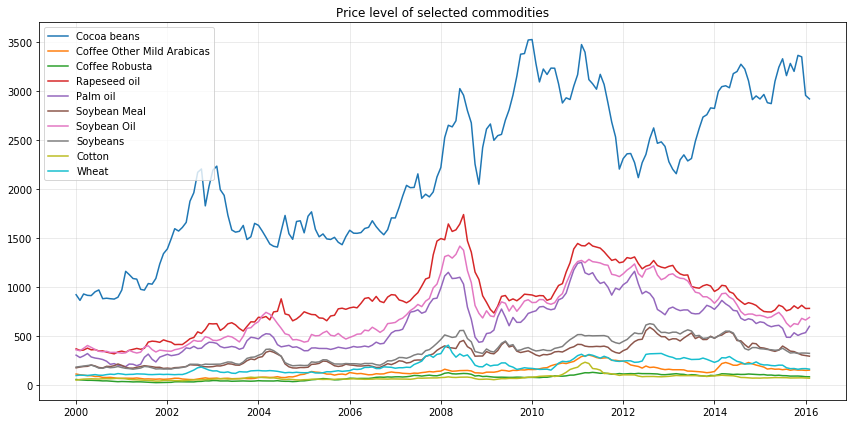

In [502]:
fig = plt.figure(figsize=[12,6])

plt.plot(df.loc["2000-01-01":,:])
plt.title("Price level of selected commodities")
plt.legend(['Cocoa beans','Coffee Other Mild Arabicas','Coffee Robusta', 'Rapeseed oil',
            'Palm oil','Soybean Meal', 'Soybean Oil', 
            'Soybeans','Cotton','Wheat'])

plt.tight_layout()
plt.grid(b="both", alpha=0.3)
plt.show()

## STATIONARY DATASET

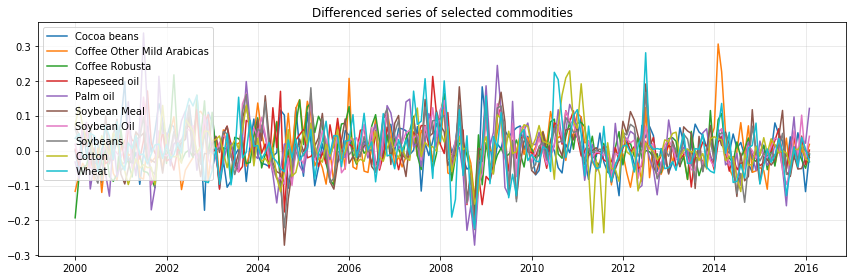

In [503]:
dfs = df.pct_change().dropna()

fig = plt.figure(figsize=[12,4])

plt.plot(dfs.loc["2000-01-01"::])
plt.title("Differenced series of selected commodities")
plt.legend(['Cocoa beans','Coffee Other Mild Arabicas','Coffee Robusta', 'Rapeseed oil',
            'Palm oil','Soybean Meal', 'Soybean Oil', 
            'Soybeans','Cotton','Wheat'])


plt.tight_layout()
plt.grid(b="both", alpha=0.3)
plt.show()

Time series evolution of reindexed series (left) and percentage change (right), after the great recession 2009-01-01


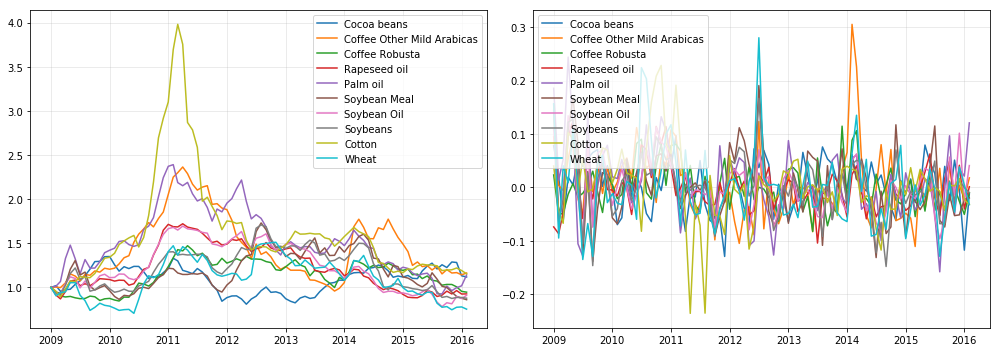

In [534]:
dfs = df.pct_change().dropna()
df_reindexed = df/df.loc["2009-01-01",:] # reindexed at 2009-01-01

f = plt.figure(figsize=(14, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

print("Time series evolution of reindexed series (left) and percentage change (right), after the great recession 2009-01-01")

ax1.plot(df_reindexed.loc["2009-01-01":,:])
ax1.legend(['Cocoa beans','Coffee Other Mild Arabicas','Coffee Robusta', 'Rapeseed oil',
            'Palm oil','Soybean Meal', 'Soybean Oil', 
            'Soybeans','Cotton','Wheat'],
          loc="upper right")
ax1.grid(b="both", alpha=0.3)

ax2.plot(dfs.loc["2009-01-01":,:])
ax2.legend(['Cocoa beans','Coffee Other Mild Arabicas','Coffee Robusta', 'Rapeseed oil',
            'Palm oil','Soybean Meal', 'Soybean Oil', 
            'Soybeans','Cotton','Wheat'], loc="upper left")
ax2.grid(b="both", alpha=0.3)

plt.tight_layout()
plt.show()

## CORRELATION ANALYSIS

In [505]:
# correlation matrix
corr = dfs.corr()
print("Correlation matrix of stationary dataset")
corr

Correlation matrix of stationary dataset


,Cocoa beans,Coffee Other Mild Arabicas,Coffee Robusta,Rapeseed oil,Palm oil,Soybean Meal,Soybean Oil,Soybeans,Cotton,Wheat
Cocoa beans,1.000000,0.123758,0.193509,0.060906,0.082092,0.064458,0.108121,0.085293,0.072025,0.123783
Coffee Other Mild Arabicas,0.123758,1.000000,0.763627,0.003030,0.097113,0.104981,0.111303,0.114385,0.039514,0.175960
Coffee Robusta,0.193509,0.763627,1.000000,0.021111,0.142633,0.101799,0.096846,0.113240,0.027249,0.141797
Rapeseed oil,0.060906,0.003030,0.021111,1.000000,0.371008,0.182531,0.419408,0.300382,0.137256,0.166156
Palm oil,0.082092,0.097113,0.142633,0.371008,1.000000,0.225609,0.686923,0.442937,0.215945,0.253482
Soybean Meal,0.064458,0.104981,0.101799,0.182531,0.225609,1.000000,0.495086,0.891178,0.184510,0.420660
Soybean Oil,0.108121,0.111303,0.096846,0.419408,0.686923,0.495086,1.000000,0.774022,0.282283,0.366406
Soybeans,0.085293,0.114385,0.113240,0.300382,0.442937,0.891178,0.774022,1.000000,0.274086,0.454891
Cotton,0.072025,0.039514,0.027249,0.137256,0.215945,0.184510,0.282283,0.274086,1.000000,0.125619
Wheat,0.123783,0.175960,0.141797,0.166156,0.253482,0.420660,0.366406,0.454891,0.125619,1.000000


### interview question

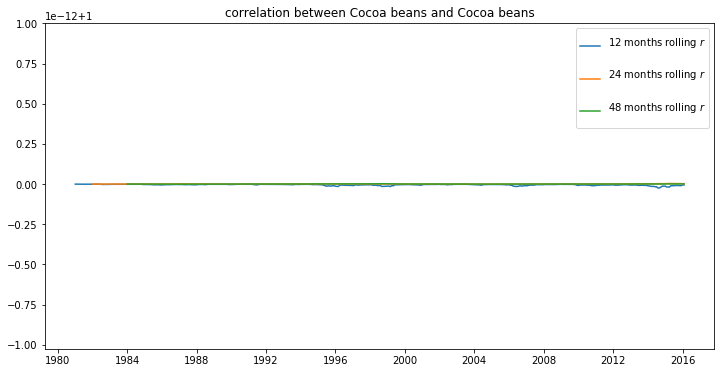

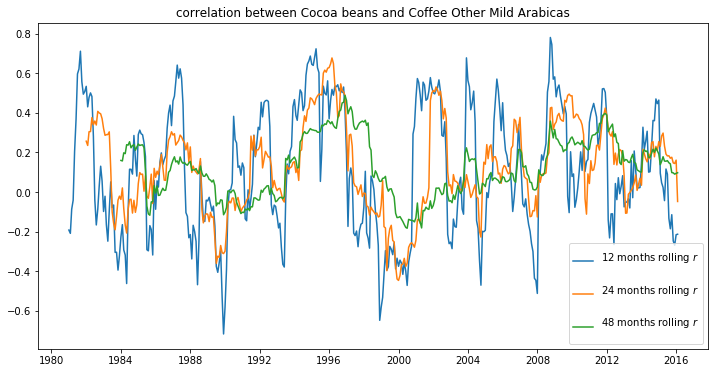

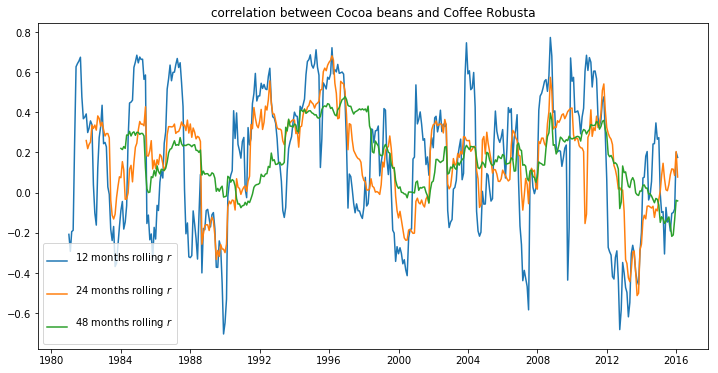

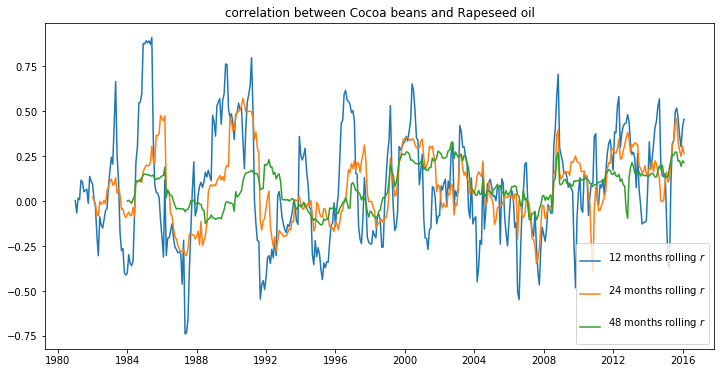

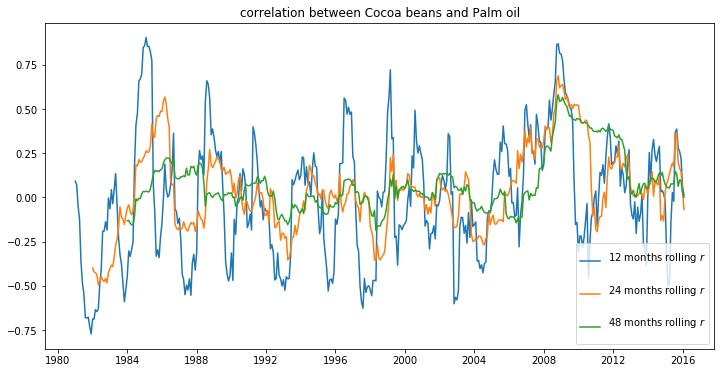

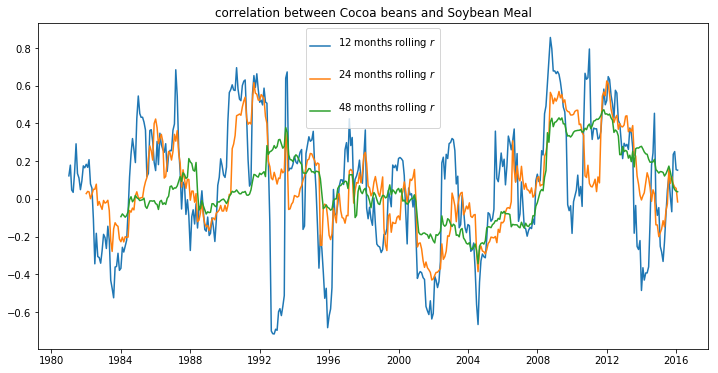

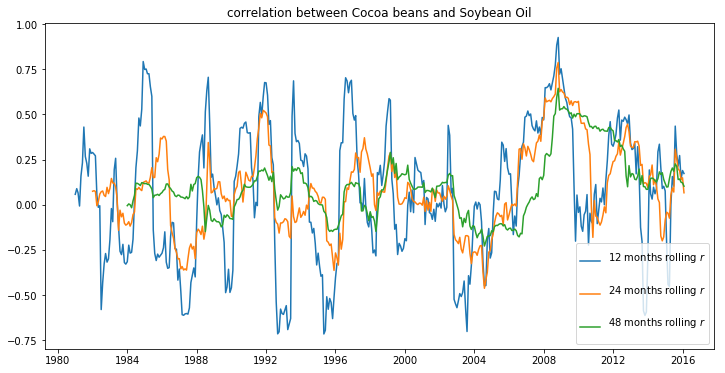

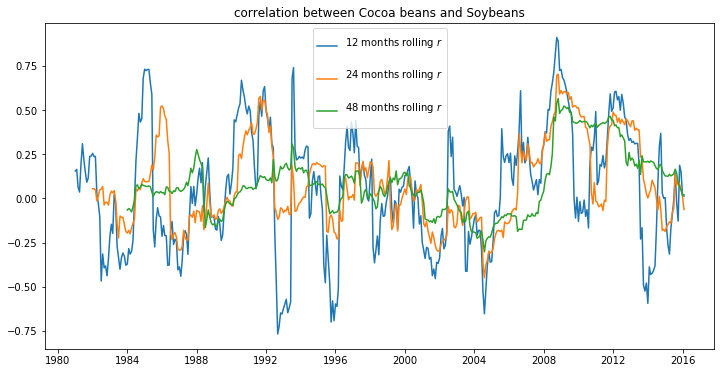

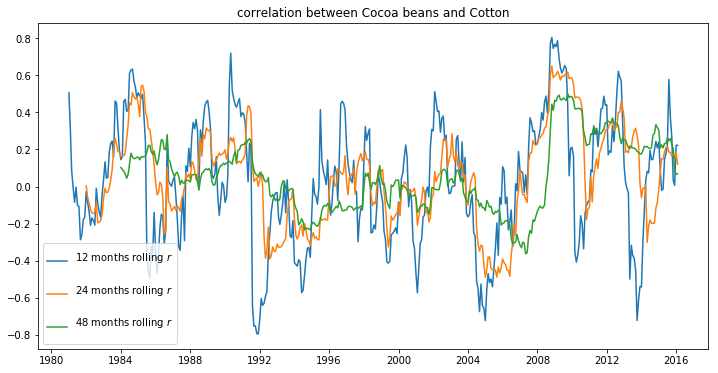

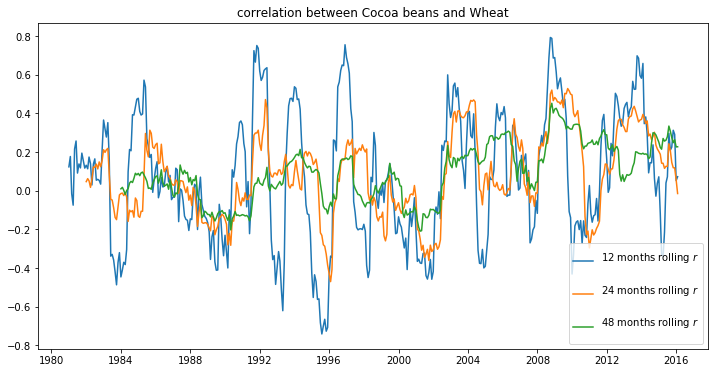

In [528]:
# rolling correlation function

def df_rolling_corr(variable="Cocoa beans", a = [12, 24, 48]):
    
    for i in range(0,10):

        fig = plt.figure(figsize=[12,6])

        plt.plot(dfs.loc[:,variable].rolling(window = a[0]).corr(other = dfs.iloc[:,i]))
        plt.plot(dfs.loc[:,variable].rolling(window = a[1]).corr(other = dfs.iloc[:,i]))
        plt.plot(dfs.loc[:,variable].rolling(window = a[2]).corr(other = dfs.iloc[:,i]))
        plt.legend(["12 months rolling $r$\n",
                    "24 months rolling $r$\n",
                    "48 months rolling $r$\n"])
        plt.title("correlation between %s and %s" %(variable, dfs.columns[i]))

        plt.show()

df_rolling_corr(variable="Cocoa beans", a = [12, 24, 48])

## ARMA MODEL ON SOYBEANS

- Fitted an ARMA(2,2). Stefan told me you use past prices to forecast future prices.

In [507]:
dates = df.index
y = pd.Series(df.Soybeans, index=dates)
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

arma_res.summary()

/Users/giovanni/Desktop/AI_ML_DL_DataScience/anaconda3/envs/DL/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Soybeans   No. Observations:                  434
Model:                     ARMA(2, 2)   Log Likelihood               -1856.786
Method:                       css-mle   S.D. of innovations             17.335
Date:                Tue, 19 Feb 2019   AIC                           3723.573
Time:                        15:35:03   BIC                           3743.938
Sample:                    01-01-1980   HQIC                          3731.611
                         - 02-01-2016                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.Soybeans     0.6383      0.279      2.286      0.023       0.091       1.185
ar.L2.Soybeans     0.3569      0.278      1.282      0.201      -0.189       0.903
ma.L1.Soybeans     0.6739      0.274      2.456      0.014       0.136       1.212
ma.L2.Soybeans     0.2341      0.082      2.849      0.005       0.073       0.395
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0035           +0.0000j            1.0035            0.0000
AR.2           -2.7918           +0.0000j            2.7918            0.5000
MA.1           -1.4395           -1.4833j            2.0669           -0.3726
MA.2           -1.4395           +1.4833j            2.0669            0.3726
-----------------------------------------------------------------------------
"""

In [508]:
print("the last observation is :", df.index[-1])

the last observation is : 2016-02-01 00:00:00


In [509]:
arma_res.forecast(steps=5)[0] # 0 = point forecast; 1 = SE; 2 = CI

array([317.3390752 , 315.94008644, 314.93362257, 313.79184801,
       312.70381306])

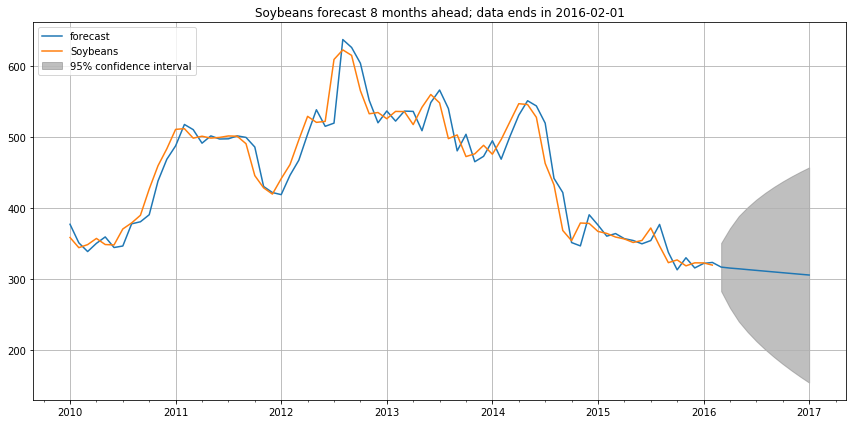

In [510]:
fig, ax = plt.subplots(figsize=(12,6))
fig = arma_res.plot_predict(start='2010-01-01', end='2017-01-01', ax=ax)
legend = ax.legend(loc='upper left')
plt.title("Soybeans forecast 8 months ahead; data ends in 2016-02-01")
plt.grid()
plt.tight_layout()
plt.show()

## HP FILTER ON COCOA

- Used in Economics to fit business cycles

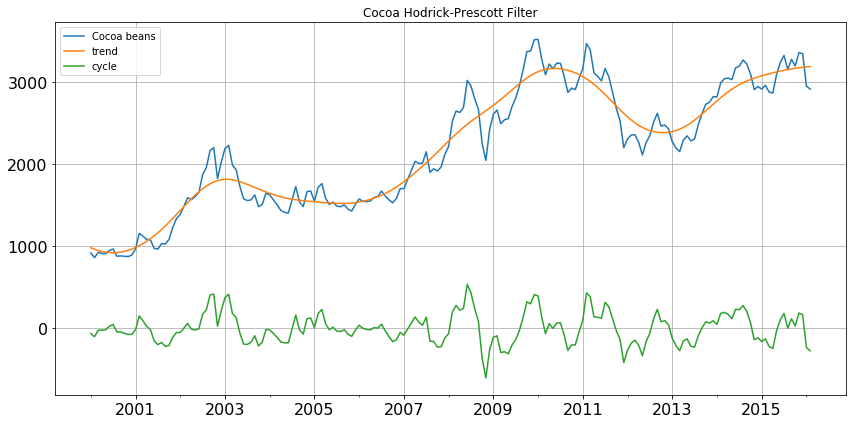

In [511]:
cocoa_cycle, cocoa_trend = sm.tsa.filters.hpfilter(df["Cocoa beans"])
cocoa_decomp = df[["Cocoa beans"]].copy()
cocoa_decomp["cycle"] = cocoa_cycle
cocoa_decomp["trend"] = cocoa_trend

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
cocoa_decomp[["Cocoa beans", "trend", "cycle"]]["2000-01-01":].plot(ax=ax, fontsize=16);
legend.prop.set_size(20);
plt.title("Cocoa Hodrick-Prescott Filter")
plt.xlabel("")

plt.tight_layout()
plt.grid()
plt.show()

## Principal Component Analysis

- Is it possible to produce a rolling PCA?
- Search for PCA on TS not cross-sectional

In [512]:
X = df
y = df.columns

X_std = StandardScaler().fit_transform(X)

Especially, in the field of "Finance," the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix. Eigendecomposition of the standardized data based on the correlation matrix.

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

#### Eigenvectors and Eigenvalues

In [513]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.29425838 -0.20762655  0.4777425  -0.63154893 -0.27921312  0.36308483
   0.16009762  0.05075577 -0.07212833 -0.00328931]
 [-0.28326301 -0.47611334  0.02305552 -0.03066772  0.03794482 -0.73943993
   0.35921957  0.01275724 -0.11657296  0.02457983]
 [-0.18510249 -0.67590298  0.18323258  0.42325145  0.21482401  0.30539708
  -0.36499602  0.04771476  0.13956265 -0.04222553]
 [-0.34595134  0.20862019  0.03765379  0.2696523  -0.42111603 -0.0667645
   0.08272127  0.52339177  0.54135693  0.08378442]
 [-0.35805349  0.06666669 -0.06981028  0.10028255 -0.40686611 -0.06859705
  -0.19945017 -0.78472711  0.1625599   0.01322399]
 [-0.32723759  0.27494709  0.15585527 -0.25008743  0.5558289  -0.16937932
  -0.18487595 -0.03563387  0.34806589 -0.48605678]
 [-0.36312035  0.17189449 -0.0485089   0.18117789 -0.20980236 -0.02831444
  -0.27870664  0.24193301 -0.68172784 -0.397035  ]
 [-0.35948621  0.21318071  0.06768911 -0.07533147  0.30786013 -0.06326076
  -0.28845585  0.06105551 -0.18184872 

#### Singular Vector Decomposition

In [514]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.29425838,  0.20762655,  0.4777425 ,  0.63154893,  0.27921312,
         0.36308483, -0.16009762, -0.05075577,  0.07212833, -0.00328931],
       [-0.28326301,  0.47611334,  0.02305552,  0.03066772, -0.03794482,
        -0.73943993, -0.35921957, -0.01275724,  0.11657296,  0.02457983],
       [-0.18510249,  0.67590298,  0.18323258, -0.42325145, -0.21482401,
         0.30539708,  0.36499602, -0.04771476, -0.13956265, -0.04222553],
       [-0.34595134, -0.20862019,  0.03765379, -0.2696523 ,  0.42111603,
        -0.0667645 , -0.08272127, -0.52339177, -0.54135693,  0.08378442],
       [-0.35805349, -0.06666669, -0.06981028, -0.10028255,  0.40686611,
        -0.06859705,  0.19945017,  0.78472711, -0.1625599 ,  0.01322399],
       [-0.32723759, -0.27494709,  0.15585527,  0.25008743, -0.5558289 ,
        -0.16937932,  0.18487595,  0.03563387, -0.34806589, -0.48605678],
       [-0.36312035, -0.17189449, -0.0485089 , -0.18117789,  0.20980236,
        -0.02831444,  0.27870664, -0.24193301

#### Selecting PCs

The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following two lines of code:

In [515]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.842437392195904
1.3681245680923715
0.6128792428290551
0.3698355341399169
0.35748949757232534
0.22769433628845687
0.11421042931274335
0.07211782701408731
0.029996078157271174
0.0052150943978698195


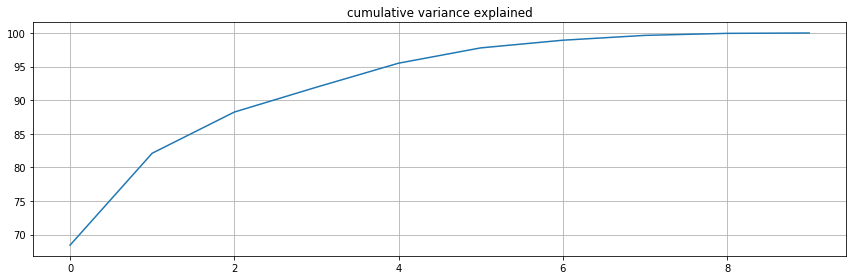

In [516]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

fig = plt.figure(figsize=[12,4])
plt.plot(cum_var_exp)
plt.title("cumulative variance explained")
plt.tight_layout()
plt.grid()
plt.show()

The construction of the projection matrix that will be used to transform the data onto the new feature subspace. Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our 𝑑×𝑘-dimensional eigenvector matrix 𝐖.

In [517]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1), 
                      eig_pairs[1][1].reshape(10,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.29425838 -0.20762655]
 [-0.28326301 -0.47611334]
 [-0.18510249 -0.67590298]
 [-0.34595134  0.20862019]
 [-0.35805349  0.06666669]
 [-0.32723759  0.27494709]
 [-0.36312035  0.17189449]
 [-0.35948621  0.21318071]
 [-0.25577786 -0.22464749]
 [-0.34268503  0.15601123]]


#### Projection ont othe new feature space

In this last step we will use the 10×2-dimensional projection matrix 𝐖 to transform our samples onto the new subspace via the equation
𝐘=𝐗×𝐖, where 𝐘 is a 434×2 matrix of our transformed samples.

In [518]:
Y = X_std.dot(matrix_w)

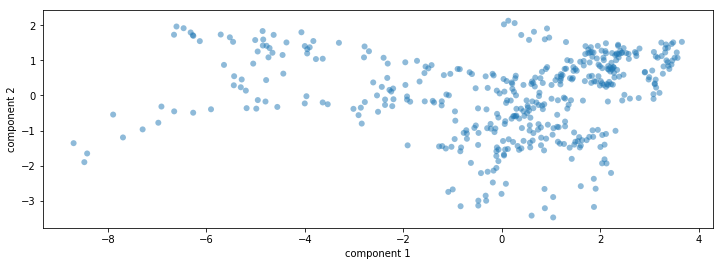

In [519]:
fig = plt.figure(figsize=[12,4])

plt.scatter(Y[:, 0], Y[:, 1],
            edgecolor = 'none', alpha = 0.5,
            cmap = plt.cm.get_cmap('magma', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()